In [25]:
import pandas as pd
import os
#loading and joining the tables based on the first colum "numero_boletim" or"num_boletim"
def load_and_concatenate_csvs(directory_path, delimiter=';'):
    csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
    dataframes = []
    for file in csv_files:
        file_path = os.path.join(directory_path, file)
        try:
            df = pd.read_csv(file_path, encoding='utf-8', delimiter=delimiter, on_bad_lines='skip')
        except UnicodeDecodeError:
            df = pd.read_csv(file_path, encoding='latin1', delimiter=delimiter, on_bad_lines='skip')
        dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True)


si_bol_path = './si-bol'
si_env_path = './si-env'
si_veic_path = './si-veic'
si_log_path = './si-log'
pd.options.display.max_columns = None

df_si_bol = load_and_concatenate_csvs(si_bol_path)
df_si_env = load_and_concatenate_csvs(si_env_path)
df_si_veic = load_and_concatenate_csvs(si_veic_path)
df_si_log = load_and_concatenate_csvs(si_log_path)



print("si-bol DataFrame shape:", df_si_bol.shape)
print("si-env DataFrame shape:", df_si_env.shape)
print("si-veic DataFrame shape:", df_si_veic.shape)
print("si-log DataFrame shape:", df_si_log.shape)


df_si_env.rename(columns={'num_boletim': 'numero_boletim'}, inplace=True)

joined_df = df_si_bol.merge(df_si_env, on="numero_boletim", how="outer")
joined_df = joined_df.merge(df_si_veic, on="numero_boletim", how="outer" )
joined_df = joined_df.merge(df_si_log, on="numero_boletim", how="outer")

joined_df.drop_duplicates().dropna().head()



si-bol DataFrame shape: (44371, 23)
si-env DataFrame shape: (99485, 16)
si-veic DataFrame shape: (78867, 11)
si-log DataFrame shape: (59955, 16)


,numero_boletim,data hora_boletim,data_inclusao,tipo_acidente,desc_tipo_acidente,cod_tempo,desc_tempo,cod_pavimento,pavimento,cod_regional,desc_regional,origem_boletim,local_sinalizado,velocidade_permitida,coordenada_x,coordenada_y,hora_informada,indicador_fatalidade,valor_ups,descricao_ups,data_alteracao_smsa,valor_ups_antiga,descricao_ups_antiga,data_hora_boletim_x,numero_envolvido,condutor,codigo_severidade,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,nascimento,categoria_habilitacao,descricao_habilitacao,declaracao_obito,cod_severidade_antiga,especie_veiculo,data_hora_boletim_y,sequencial_veiculo,codigo_categoria,descricao_categoria,codigo_especie,descricao_especie,codigo_situacao,descricao_situacao,tipo_socorro,descricao_tipo_socorro,data_boletim,numero_municipio,nome_municipio,sequencia_logradouros,numero_logradouro,tipo_logradouro,nome_logradouro,tipo_logradouro_anterior,nome_logradoro_anterior,Numero_bairro,nome_bairro,tipo_bairro,descricao_tipo_bairro,numero_imovel,numero_imovel_proximo
0,90,31/12/2012 21:51,20/08/2013 00:00,H02002,CAPOTAMENTO/TOMBAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,22,NOROESTE,NI,NÃO INFORMADO,0,60599914.0,79978652.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2012 21:51,1,SIM,1,NAO FATAL,M,SIM,NÃO INFORMADO,49,21/12/1963,C,"VEIC. MOTOR. P/ TRANSP. DE CARGA, C/ PESO MAX....",0,0,AUTOMOVEL,31/12/2012 21:51,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,3.0,AMBULANCIA,31/12/2012 21:51,1.0,BELO HORIZONTE,1.0,94910.0,RUA,FLOR DO AMENDOIM ...,NI,NÃO INFORMADO ...,1172.0,JARDIM ALVORADA ...,B,BAIRRO,223,0.0
1,90,31/12/2012 21:51,20/08/2013 00:00,H02002,CAPOTAMENTO/TOMBAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,22,NOROESTE,NI,NÃO INFORMADO,0,60599914.0,79978652.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2012 21:51,2,NÃO,1,NAO FATAL,F,NÃO INFORMADO,NÃO INFORMADO,46,06/07/1966,N,NAO INFORMADO ...,0,0,,31/12/2012 21:51,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,3.0,AMBULANCIA,31/12/2012 21:51,1.0,BELO HORIZONTE,1.0,94910.0,RUA,FLOR DO AMENDOIM ...,NI,NÃO INFORMADO ...,1172.0,JARDIM ALVORADA ...,B,BAIRRO,223,0.0
2,132,31/12/2014 22:30,11/06/2015 00:00,H08002,CHOQUE MECANICO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,24,OESTE,PMMG,NÃO INFORMADO,0,0.0,0.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2014 22:30,1,SIM,3,SEM FERIMENTOS,M,NÃO INFORMADO,NÃO INFORMADO,51,23/07/1963,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,AUTOMOVEL,31/12/2014 22:30,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,2.0,PARADO,0.0,NÃO INFORMADO,31/12/2014 22:30,1.0,BELO HORIZONTE,1.0,10320.0,ROD,ANEL RODOVIARIO CELSO MELLO AZEVEDO ...,NI,NÃO INFORMADO ...,717.0,BAIRRO MADRE GERTRUDES ...,B,BAIRRO,KM 536,0.0
3,132,31/12/2014 22:30,11/06/2015 00:00,H08002,CHOQUE MECANICO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,24,OESTE,PMMG,NÃO INFORMADO,0,0.0,0.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2014 22:30,1,SIM,3,SEM FERIMENTOS,M,NÃO INFORMADO,NÃO INFORMADO,51,23/07/1963,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,AUTOMOVEL,31/12/2014 22:30,2.0,3.0,PARTICULAR,4.0,MOTOCICLETA,1.0,EM MOVIMENTO,3.0,AMBULANCIA,31/12/2014 22:30,1.0,BELO HORIZONTE,1.0,10320.0,ROD,ANEL RODOVIARIO CELSO MELLO AZEVEDO ...,NI,NÃO INFORMADO ...,717.0,BAIRRO MADRE GERTRUDES ...,B,BAIRRO,KM 536,0.0
4,132,31/12/2014 22:30,11/06/2015 00:00,H08002,CHOQUE MECANICO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,24,OESTE,PMMG,NÃO INFORMADO,0,0.0,0.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2014 22:30,2,SIM,1,NAO FATAL,M,NÃO INFORMADO,NÃO INFORMADO,24,23/03/1990,AB,HABILITADO NAS CATEGORIAS A e B ...,0,0,MOTOCICLETA,31/12/2014 22:30,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,2.0,PARADO,0.0,NÃO INFORMADO,31/12/2014 22:30,1.0,BELO HORIZONTE,1.0,10320.0,ROD,ANEL RODOVIARIO CELSO MELLO AZEVEDO ...,NI,NÃO INFORMADO ...,717.0,BAIRRO MADRE GERTRUDES ...,B,BAIRRO,KM 536,0.0


In [26]:


columns_to_be_dropped=["data_inclusao","desc_tipo_acidente",
                       "cod_tempo","pavimento","desc_regional",
                       "velocidade_permitida","origem_boletim",
                       "cod_pavimento","local_sinalizado",
                       "data_alteracao","valor_ups_antiga","cod_severidade_antiga",
                        "valor_ups","descricao_ups","data_alteracao_smsa","descricao_ups_antiga"
                        "desc_severidade","descricao_habilitacao","codigo_situacao",
                        "cod_tipo_socoro", "data_hora_boletim","nome_municipio",
                        "numero_imovel_proximo","numero_imovel","descricao_tipo_bairro",
                        "tipo_bairro","Numero_bairro","sequencia_logradouros","numero_logradouro",
                        "nome_logradouro","tipo_logradouo_anterior","nome_logradoro_anterior"
                        "cod_tipo_socorro","coordenada_x","coordenada_y","descrição_categoria",
                        "cod_especie","tipo_logradouro_anterior"
                        "descricao_ups_antiga","hora_informada","nascimento",
                        "descricao_categoria","numero_municipio","nome_logradoro_anterior","data_boletim",
                        "data_hora_boletim_y","data_hora_boletim_x","descricao_ups_antiga","cod_regional",
                        "tipo_logradouro_anterior","codigo_especie","codigo_categoria","tipo_socorro",
                        "codigo_severidade","declaracao_obito","sequencial_veiculo","numero_envolvido",
                        "desc_tempo","Embreagues","cinto_seguranca","indicador_fatalidade","especie_veiculo"
                       ]
full_df = joined_df
joined_df = joined_df.drop(columns=columns_to_be_dropped, errors='ignore')

joined_df =joined_df.drop_duplicates()
display(joined_df.head())

,numero_boletim,data hora_boletim,tipo_acidente,condutor,desc_severidade,sexo,Idade,categoria_habilitacao,descricao_especie,descricao_situacao,descricao_tipo_socorro,tipo_logradouro,nome_bairro
0,90,31/12/2012 21:51,H02002,SIM,NAO FATAL,M,49,C,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...
1,90,31/12/2012 21:51,H02002,NÃO,NAO FATAL,F,46,N,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...
2,132,31/12/2014 22:30,H08002,SIM,SEM FERIMENTOS,M,51,B,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...
3,132,31/12/2014 22:30,H08002,SIM,SEM FERIMENTOS,M,51,B,MOTOCICLETA,EM MOVIMENTO,AMBULANCIA,ROD,BAIRRO MADRE GERTRUDES ...
4,132,31/12/2014 22:30,H08002,SIM,NAO FATAL,M,24,AB,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...


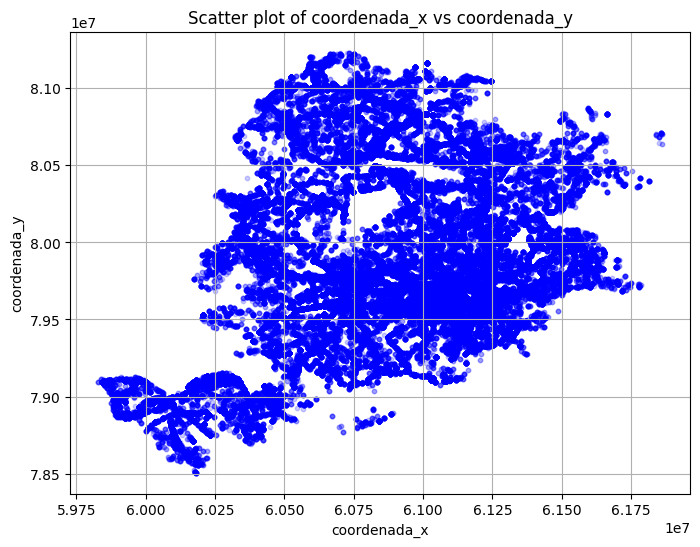

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming joined_df is your large DataFrame containing coordenada_x and coordenada_y columns
# Example DataFrame (replace this with your actual DataFrame)


filtered_df = full_df[(full_df['coordenada_x'] > 0) & (full_df['coordenada_y'] > 0)]

plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.scatter(filtered_df['coordenada_x'], filtered_df['coordenada_y'], marker='o', color='b',s=10, alpha=0.2)
plt.title('Scatter plot of coordenada_x vs coordenada_y')
plt.xlabel('coordenada_x')
plt.ylabel('coordenada_y')
plt.grid(True)
plt.show()


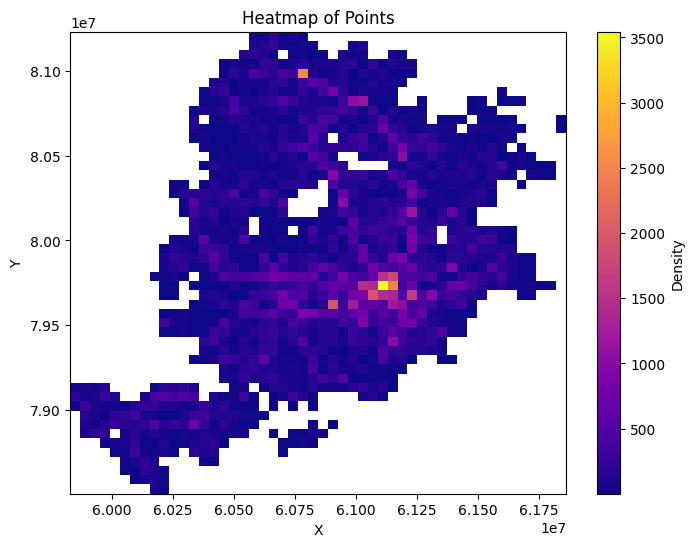

In [28]:

# Create 2D histogram (heatmap)
import numpy as np
plt.figure(figsize=(8, 6))

hist, xedges, yedges, _ = plt.hist2d(filtered_df['coordenada_x'], filtered_df['coordenada_y'], bins=50, cmap='plasma', cmin=1)
plt.colorbar(label='Density')
plt.title('Heatmap of Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


## Clustering


In [29]:
#binning hour of day and age
clustering_df = joined_df

clustering_df['data hora_boletim'] = pd.to_datetime(clustering_df['data hora_boletim'], format='%d/%m/%Y %H:%M')
clustering_df['hour'] = clustering_df['data hora_boletim'].dt.hour

#hour binning
morning_hours = range(6, 12)  
afternoon_hours = range(12, 18)  
night_hours = list(range(0, 6)) + list(range(18, 24)) 


clustering_df['morning'] = clustering_df['hour'].apply(lambda x: True if x in morning_hours else False)
clustering_df['afternoon'] = clustering_df['hour'].apply(lambda x: True if x in afternoon_hours else False)
clustering_df['night'] = clustering_df['hour'].apply(lambda x: True if x in night_hours else False)

clustering_df.drop(columns=['hour','data hora_boletim'], inplace=True)



In [30]:
#age binning

children = range(0,16)
young_adult = range(17,30)
middle_aged = range(31,45)
old_aged = range(45,200)

clustering_df['Idade'] =clustering_df['Idade'].astype('int')
clustering_df['children'] = clustering_df['Idade'].apply(lambda x: True if x in children else False)
clustering_df['young_adult'] = clustering_df['Idade'].apply(lambda x: True if x in young_adult else False)
clustering_df['middle_aged'] = clustering_df['Idade'].apply(lambda x: True if x in middle_aged else False)
clustering_df['old_aged'] = clustering_df['Idade'].apply(lambda x: True if x in old_aged else False)

clustering_df.drop(columns=['Idade'], inplace=True)
clustering_df.head()

,numero_boletim,tipo_acidente,condutor,desc_severidade,sexo,categoria_habilitacao,descricao_especie,descricao_situacao,descricao_tipo_socorro,tipo_logradouro,nome_bairro,morning,afternoon,night,children,young_adult,middle_aged,old_aged
0,90,H02002,SIM,NAO FATAL,M,C,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...,False,False,True,False,False,False,True
1,90,H02002,NÃO,NAO FATAL,F,N,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...,False,False,True,False,False,False,True
2,132,H08002,SIM,SEM FERIMENTOS,M,B,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,False,False,False,True
3,132,H08002,SIM,SEM FERIMENTOS,M,B,MOTOCICLETA,EM MOVIMENTO,AMBULANCIA,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,False,False,False,True
4,132,H08002,SIM,NAO FATAL,M,AB,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,False,True,False,False


In [31]:
#prepping "descricao_veiculo" for one hot encoding

#grouping "tipos de caminhão"
trucks_to_be_grouped =["CAMINHAO-TRATOR","CAMIONETA","REBOQUE E SEMI-REBOQUE","REBOQUE E SEMI-REBOQUE"]
for i in trucks_to_be_grouped:
    clustering_df['descricao_especie'] = clustering_df['descricao_especie'].str.strip().replace(i,"CAMINHAO")

#grouping "microoonibus"
clustering_df['descricao_especie'] = clustering_df['descricao_especie'].str.strip().replace("MICROONIBUS","CAMINHAO")

#grouping "motoneta"
clustering_df['descricao_especie'] = clustering_df['descricao_especie'].str.strip().replace("MOTONETA","MOTOCICLETA")

#grouping "other vehicles"
other_vehicles =["CARRO DE MAO","CARROCA","CICLOMOTOR","ESPECIAL","MISTO","NAO INFORMADO",
                 "TRACAO","TRATOR DE RODAS","TRATOR MISTO","TREM","TRICICLO","CHARRETE"]
for i in other_vehicles:
    clustering_df['descricao_especie'] = clustering_df['descricao_especie'].str.strip().replace(i,"OUTROS TIPOS DE VEICULOS")
#One hot encoding categorical data

vehicles_one_hot = pd.get_dummies(clustering_df['descricao_especie'])
true_counts = vehicles_one_hot.sum()
print(true_counts)
clustering_df.drop(columns=['descricao_especie'],inplace=True)

AUTOMOVEL                   91339
BICICLETA                    2748
CAMINHAO                    11157
MOTOCICLETA                 68769
ONIBUS                      18764
OUTROS TIPOS DE VEICULOS     3813
dtype: int64


In [32]:
#prepping "descricao_tipo_socorro"
clustering_df['descricao_tipo_socorro'] = clustering_df['descricao_tipo_socorro'].apply(lambda x: "socorro:"+ str(x))
descricao_tipo_socorro_one_hot = pd.get_dummies(clustering_df['descricao_tipo_socorro'])
true_counts = descricao_tipo_socorro_one_hot.sum()
# print(true_counts)
descricao_tipo_socorro_one_hot.head()
clustering_df.drop(columns=['descricao_tipo_socorro'],inplace=True)

In [33]:
#prepping "descricao_severidade"
clustering_df['desc_severidade'] = clustering_df['desc_severidade'].apply(lambda x: "fatalidade:"+ str(x))
desc_severidade_one_hot = pd.get_dummies(clustering_df['desc_severidade'])
true_counts = desc_severidade_one_hot.sum()
desc_severidade_one_hot.head()
clustering_df.drop(columns=['desc_severidade'],inplace=True)
print(true_counts)

fatalidade:FATAL                 823
fatalidade:NAO FATAL          103480
fatalidade:NAO INFORMADO       11651
fatalidade:SEM FERIMENTOS      80641
dtype: int64


In [34]:
#prepping "descricao_situação"
clustering_df['descricao_situacao'] = clustering_df['descricao_situacao'].str.strip().replace("NÃO INFORMADO","MOVIMENTO NAO INFORMADO")
clustering_df['descricao_situacao'] = clustering_df['descricao_situacao'].str.strip().replace("","MOVIMENTO NAO INFORMADO")
descricao_situacao_one_hot = pd.get_dummies(clustering_df['descricao_situacao'])
true_counts = descricao_situacao_one_hot.sum()
descricao_situacao_one_hot.head()
print(true_counts)
clustering_df.drop(columns=['descricao_situacao'],inplace=True)

EM MOVIMENTO               177435
MOVIMENTO NAO INFORMADO      5516
PARADO                      13639
dtype: int64


In [35]:
#prepping "condutor"
clustering_df['condutor'] = clustering_df['condutor'].apply(lambda x: "condutor:"+ str(x))
condutor_one_hot = pd.get_dummies(clustering_df['condutor'])
true_counts = condutor_one_hot.sum()
condutor_one_hot.head()
clustering_df.drop(columns=['condutor'],inplace=True)
print(true_counts)

condutor:NÃO               34254
condutor:NÃO INFORMADO       244
condutor:SIM              162097
dtype: int64


In [36]:
#prepping "tipo_logradouo"
to_be_replace =["TRV","TUN","VDP","VDT","VIA"
                ,"BEC","ELP","EST","NI","ALA"]
for r in to_be_replace:
    clustering_df['tipo_logradouro'] = clustering_df['tipo_logradouro'].str.strip().replace(r,"OUTROS_LOCAIS")
logradouro_one_hot = pd.get_dummies(clustering_df['tipo_logradouro'])
true_counts = logradouro_one_hot.sum()
logradouro_one_hot.head()
# clustering_df.drop(columns=['tipo_logradouro'],inplace=True)
print(true_counts)

AVE              87675
OUTROS_LOCAIS     2536
PCA               2064
ROD              14637
RUA              89533
dtype: int64


In [37]:
#prepping "sexo"
clustering_df['sexo'] = clustering_df['sexo'].str.strip().replace("0","sexo nao informado")
sexo_one_hot = pd.get_dummies(clustering_df['sexo'])
true_counts = sexo_one_hot.sum()
sexo_one_hot.head()
print(true_counts)
clustering_df.drop(columns="sexo",inplace=True)

F                      43226
M                     142391
sexo nao informado     10978
dtype: int64


In [38]:
#encoding "tipo de acidente"
tipo_acidente_one_hot = pd.get_dummies(clustering_df['tipo_acidente'])
true_counts = tipo_acidente_one_hot.sum()
tipo_acidente_one_hot.head()

print(true_counts)
clustering_df.drop(columns="tipo_acidente",inplace=True)

H01002    97329
H02002     5154
H03002      940
H04000     7638
H05002       97
H06001      524
H06002    17766
H07002      182
H08002    32017
H09002    32097
H99002     2851
dtype: int64


In [39]:
# Joining all one hot encoded dfs
clustering_df.drop(columns=["numero_boletim","categoria_habilitacao","tipo_logradouro"],inplace=True)
concat_dfs= pd.concat([clustering_df.reset_index(drop=True),condutor_one_hot.reset_index(drop=True)
                       ,descricao_situacao_one_hot.reset_index(drop=True),
                       
                       descricao_tipo_socorro_one_hot.reset_index(drop=True),
                       vehicles_one_hot.reset_index(drop=True),
                        logradouro_one_hot.reset_index(drop=True),
                         sexo_one_hot.reset_index(drop=True),
                         tipo_acidente_one_hot.reset_index(drop=True),
                         desc_severidade_one_hot.reset_index(drop=True  )],axis=1)
display(concat_dfs.head())
# display(descricao_situacao_one_hot)

,nome_bairro,morning,afternoon,night,children,young_adult,middle_aged,old_aged,condutor:NÃO,condutor:NÃO INFORMADO,condutor:SIM,EM MOVIMENTO,MOVIMENTO NAO INFORMADO,PARADO,socorro:AMBULANCIA,socorro:NÃO INFORMADO,socorro:TERCEIROS,socorro:VEICULO ENVOLVIDO,socorro:VIATURA PMMG,socorro:nan,AUTOMOVEL,BICICLETA,CAMINHAO,MOTOCICLETA,ONIBUS,OUTROS TIPOS DE VEICULOS,AVE,OUTROS_LOCAIS,PCA,ROD,RUA,F,M,sexo nao informado,H01002,H02002,H03002,H04000,H05002,H06001,H06002,H07002,H08002,H09002,H99002,fatalidade:FATAL,fatalidade:NAO FATAL,fatalidade:NAO INFORMADO,fatalidade:SEM FERIMENTOS
0,JARDIM ALVORADA ...,False,False,True,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
1,JARDIM ALVORADA ...,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
2,BAIRRO MADRE GERTRUDES ...,False,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,BAIRRO MADRE GERTRUDES ...,False,False,True,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,BAIRRO MADRE GERTRUDES ...,False,False,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False


In [40]:
grouped = concat_dfs.groupby('nome_bairro').sum()
grouped_sorted = grouped.sort_values(by='night', ascending=False)
grouped_sorted.reset_index(inplace=True)
grouped_sorted = grouped_sorted.drop(index=0)
grouped_sorted["nome_bairro"]=grouped_sorted["nome_bairro"].str.rstrip()


#dropping colluimns with very small numbers

to_be_dropped =["condutor:NÃO INFORMADO","socorro:nan"]

grouped_sorted.drop(columns=to_be_dropped,inplace=True)
display(grouped_sorted.head())

,nome_bairro,morning,afternoon,night,children,young_adult,middle_aged,old_aged,condutor:NÃO,condutor:SIM,EM MOVIMENTO,MOVIMENTO NAO INFORMADO,PARADO,socorro:AMBULANCIA,socorro:NÃO INFORMADO,socorro:TERCEIROS,socorro:VEICULO ENVOLVIDO,socorro:VIATURA PMMG,AUTOMOVEL,BICICLETA,CAMINHAO,MOTOCICLETA,ONIBUS,OUTROS TIPOS DE VEICULOS,AVE,OUTROS_LOCAIS,PCA,ROD,RUA,F,M,sexo nao informado,H01002,H02002,H03002,H04000,H05002,H06001,H06002,H07002,H08002,H09002,H99002,fatalidade:FATAL,fatalidade:NAO FATAL,fatalidade:NAO INFORMADO,fatalidade:SEM FERIMENTOS
1,CENTRO,3050,3838,2860,865,2805,3198,2526,2836,6898,8775,193,778,2678,4608,107,741,1612,3617,42,335,3036,2508,208,5168,279,301,0,4000,2475,6728,545,3441,179,31,1029,0,38,2493,5,1406,891,235,30,5182,571,3965
2,SANTA EFIGENIA,1366,1441,1094,339,1199,1200,1029,833,3065,3425,125,351,929,1995,94,285,598,1746,50,134,1254,632,85,2526,112,108,0,1155,1040,2665,196,1657,79,27,347,0,6,400,2,819,476,88,6,2051,223,1621
3,PADRE EUSTAQUIO,834,1025,845,252,822,878,655,523,2178,2432,81,191,734,1510,17,91,352,1358,36,232,798,243,37,671,3,36,274,1720,662,1901,141,1418,56,3,116,2,10,241,1,427,410,20,9,1408,151,1136
4,VENDA NOVA,758,1001,757,288,846,813,490,491,2023,2198,69,249,599,1361,46,108,402,1059,30,132,908,343,44,1263,2,0,14,1237,591,1771,154,1088,65,11,116,0,2,269,6,525,394,40,7,1294,157,1058
5,SAO FRANCISCO,709,847,733,254,795,763,409,373,1910,1991,59,239,621,1332,26,27,283,1057,12,258,764,154,44,1034,0,6,925,324,422,1703,164,815,72,12,63,4,17,176,4,569,535,22,23,1138,164,964


### Start of clustering

In [41]:
##normalizing attributes
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
first_column = grouped_sorted.iloc[:, 0]
df_normalized = pd.DataFrame(scaler.fit_transform(grouped_sorted.iloc[:, 1:]), columns=grouped_sorted.columns[1:])

# Concatenate the first column back with the normalized columns
df_normalized = pd.concat([first_column, df_normalized], axis=1)
df_normalized= df_normalized.dropna()
display(df_normalized)

,nome_bairro,morning,afternoon,night,children,young_adult,middle_aged,old_aged,condutor:NÃO,condutor:SIM,EM MOVIMENTO,MOVIMENTO NAO INFORMADO,PARADO,socorro:AMBULANCIA,socorro:NÃO INFORMADO,socorro:TERCEIROS,socorro:VEICULO ENVOLVIDO,socorro:VIATURA PMMG,AUTOMOVEL,BICICLETA,CAMINHAO,MOTOCICLETA,ONIBUS,OUTROS TIPOS DE VEICULOS,AVE,OUTROS_LOCAIS,PCA,ROD,RUA,F,M,sexo nao informado,H01002,H02002,H03002,H04000,H05002,H06001,H06002,H07002,H08002,H09002,H99002,fatalidade:FATAL,fatalidade:NAO FATAL,fatalidade:NAO INFORMADO,fatalidade:SEM FERIMENTOS
1,CENTRO,5.686758,5.036836,4.542987,4.772632,4.881545,4.958731,5.735770,4.701286,5.196609,5.039531,6.219399,5.452689,4.633635,5.055194,8.439308,6.515089,4.871334,5.355100,5.056500,2.917275,4.931075,4.466620,5.324322,6.013453,4.101786,6.102525,-0.294431,3.396374,5.799984,4.933211,4.525077,5.116388,3.880380,6.505831,5.957893,-0.171880,1.471570,2.836046,1.798558,6.037534,4.109111,5.573519,1.260574,5.127884,4.909725,5.193366
2,SANTA EFIGENIA,3.264671,3.431854,3.375040,3.396263,3.156364,3.488343,3.473564,2.799597,3.523043,3.418178,3.808253,2.753066,3.549833,3.686409,1.041842,1.887387,2.640896,4.032955,3.472419,5.472510,2.925137,1.554354,2.024946,1.260165,-0.066603,1.904546,2.229839,5.322315,3.512969,3.356134,3.100046,4.291152,2.575291,0.259038,1.827522,1.602092,2.681239,1.597712,0.697830,2.888295,3.448985,0.949013,2.148641,3.347125,3.143998,3.476494
3,PADRE EUSTAQUIO,2.918658,3.339258,2.962272,3.965795,3.266190,3.191526,2.475531,2.603294,3.230594,3.036107,3.150668,3.731679,2.799509,3.265895,3.827901,2.292907,3.094237,3.014086,2.793527,2.865127,3.409026,2.303008,2.506105,2.777117,-0.104846,-0.194444,-0.165453,3.675891,3.083398,3.087783,3.436871,3.151704,3.085978,2.341302,1.827522,-0.171880,0.261902,1.815783,6.201471,3.675605,3.288954,2.309162,1.556596,3.031407,3.291142,3.200379
4,VENDA NOVA,2.695571,2.745106,2.849699,3.427903,3.032810,2.963204,1.985588,1.879425,3.017389,2.698121,2.602680,3.562953,2.921784,3.184051,1.906481,0.360722,2.015285,3.007271,0.756851,6.150429,2.775572,0.888051,2.506105,2.190323,-0.181330,0.155388,8.227283,0.563707,2.060896,2.947415,3.695968,2.209070,3.483179,2.601585,0.879861,3.376063,4.798159,1.091475,4.000015,4.029091,4.699224,1.085028,6.292955,2.599372,3.462810,2.867624
5,SAO FRANCISCO,1.279652,2.270556,2.671458,2.225558,2.172508,1.858130,2.221487,1.100347,2.364566,1.968268,2.164290,3.276118,2.121438,2.492603,2.098623,0.289160,1.271806,2.148558,4.830203,7.010866,1.807794,0.393939,2.299894,0.324882,-0.181330,0.271998,5.905692,2.288532,1.280407,2.321951,2.659582,2.157277,2.348319,0.259038,0.218286,3.376063,1.169153,0.631967,1.798558,2.390201,3.649023,0.472961,0.668529,1.967936,2.457327,2.216275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,BIQUINHAS,-0.532361,-0.515014,-0.588473,-0.558821,-0.605170,-0.520976,-0.488322,-0.402601,-0.584457,-0.549482,-0.630448,-0.469608,-0.529708,-0.569525,-0.591365,-0.283339,-0.550625,-0.594551,-0.600933,-0.576618,-0.576457,-0.264877,-0.518323,-0.459219,-0.104846,-0.194444,-0.294431,-0.540726,-0.492333,-0.565917,-0.527305,-0.605021,-0.602318,-0.521811,-0.246604,-0.171880,-0.342932,-0.263683,-0.402898,-0.542126,-0.651799,-0.411136,-0.515561,-0.549498,-0.534599,-0.544880
414,VILA CALIFORNIA,-0.532361,-0.507298,-0.588473,-0.590462,-0.596017,-0.511844,-0.488322,-0.408735,-0.578796,-0.546216,-0.630448,-0.469608,-0.518592,-0.569525,-0.591365,-0.283339,-0.550625,-0.587736,-0.600933,-0.576618,-0.576457,-0.264877,-0.518323,-0.448969,-0.181330,-0.194444,-0.294431,-0.540726,-0.492333,-0.559724,-0.553214,-0.591209,-0.602318,-0.521811,-0.246604,-0.171880,-0.342932,-0.279260,-0.402898,-0.542126,-0.651799,-0.411136,-0.515561,-0.546729,-0.559123,-0.537800
415,VILA ESPLANADA,-0.500492,-0.503440,-0.588473,-0.543001,-0.596017,-0.507277,-0.464128,-0.402601,-0.565589,-0.533154,-0.630448,-0.469608,-0.496360,-0.563

[18.64005678 17.25476158 23.2957668  ...  0.64044222  0.6463898
  0.40008837]


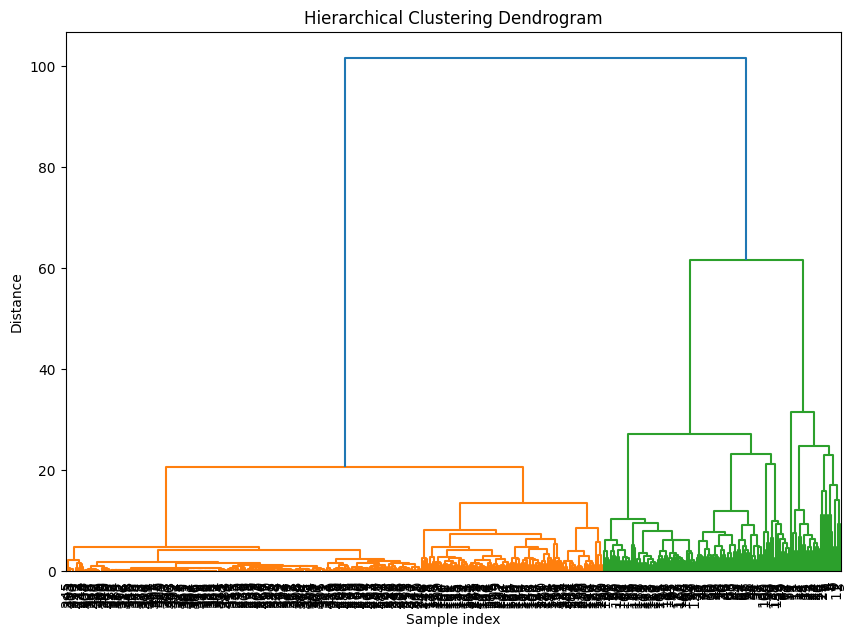

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

distance_matrix = pdist(df_normalized.iloc[:, 1:], metric='euclidean')
print(distance_matrix)

# Perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df_normalized.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

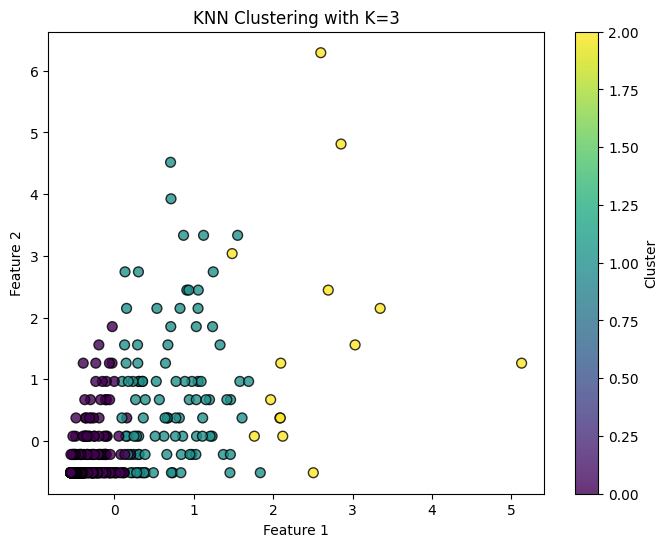

,nome_bairro,labels
1,CENTRO,2.0
2,SANTA EFIGENIA,2.0
3,PADRE EUSTAQUIO,2.0
4,VENDA NOVA,2.0
5,SAO FRANCISCO,2.0
...,...,...
412,CAMPONESA II,0.0
413,BIQUINHAS,0.0
414,VILA CALIFORNIA,0.0
415,VILA ESPLANADA,0.0


Cluster 0: 306 points
Cluster 1: 97 points
Cluster 2: 14 points


In [43]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = df_normalized.iloc[:, 1:] 
y = df_normalized.iloc[:, 0]   

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Predict clusters
labels = kmeans.predict(X)
labels_df = pd.DataFrame(labels)
clusters = pd.concat([y, labels_df], axis=1)
clusters =clusters.dropna()

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, -3], X.iloc[:, -4], c=labels, cmap='viridis', s=50, alpha=0.8, edgecolors='k')

# Plot centroids
plt.title('KNN Clustering with K=3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()
clusters.rename(columns={0: 'labels'}, inplace=True)
display(clusters)
unique_labels, label_counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, label_counts):
    print(f'Cluster {label}: {count} points')

/tmp/ipykernel_5281/2099723500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df["nome_bairro"] =small_df["nome_bairro"].str.rstrip()


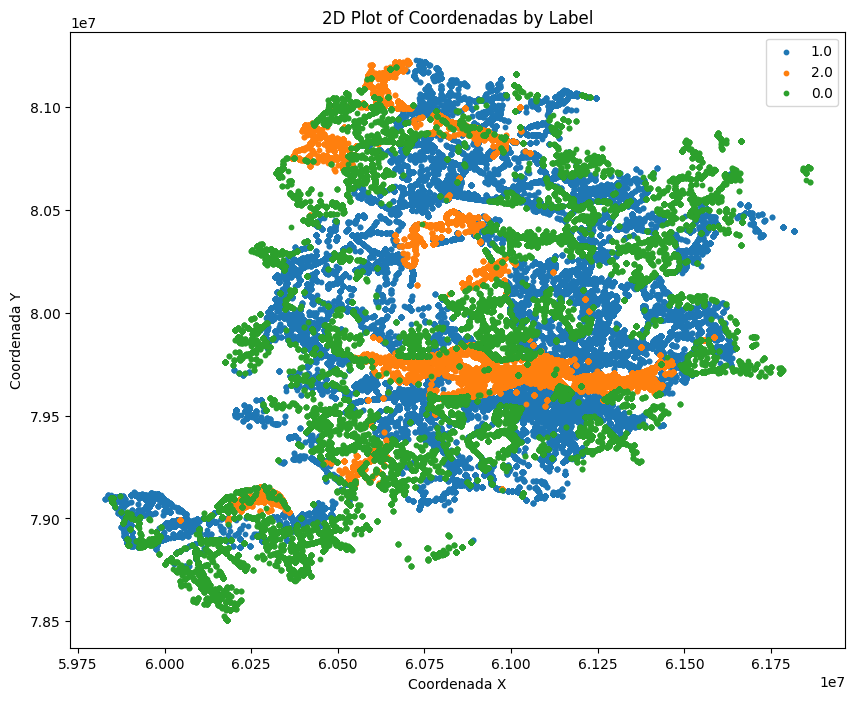

In [57]:
#plotting 
small_df =filtered_df[['coordenada_x', 'coordenada_y', 'nome_bairro']]
small_df["nome_bairro"] =small_df["nome_bairro"].str.rstrip()
merged_df = pd.merge(small_df, clusters, on='nome_bairro', how='left')

merged_df =merged_df.dropna()

plt.figure(figsize=(10, 8))


labels = merged_df['labels'].unique()
for label in labels:
    subset = merged_df[merged_df['labels'] == label]
    plt.scatter(subset['coordenada_x'], subset['coordenada_y'], label=label,s=10)


plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('2D Plot of Coordenadas by Label')
plt.legend()
plt.show()